In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import d
import microstructure
import u

In [3]:
plt.rcParams["figure.figsize"] = (20, 8)
data = d.fetch("data/stock/minute", "SPY.csv")
data = u.during_market_hours(data)
data["log_close"] = np.log(data["Close"])

<AxesSubplot:xlabel='Date'>

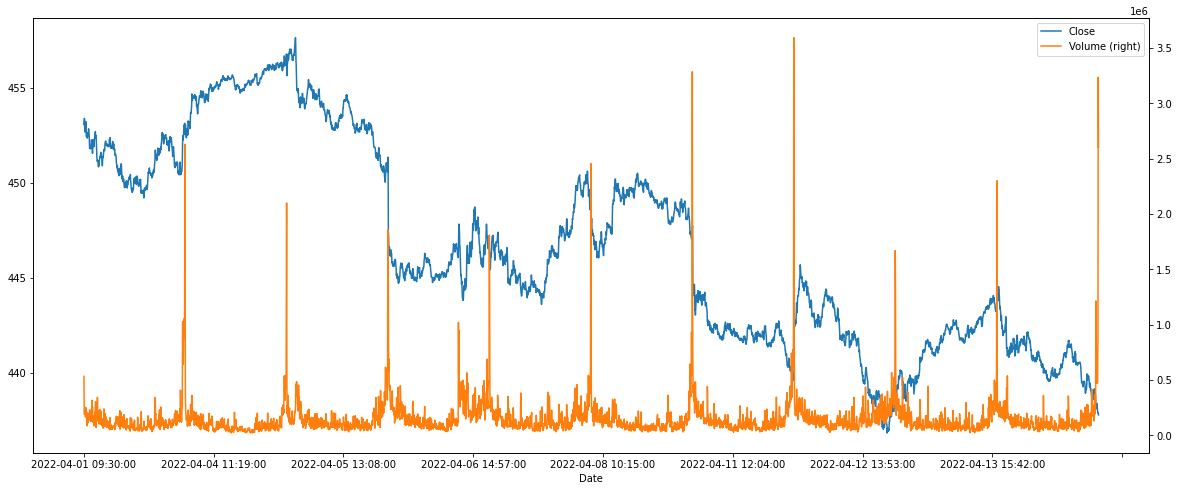

In [7]:
u.index_as_string(data[["Close", "Volume"]]).plot(secondary_y="Volume")

# Amihuds Lambda Estimate

<AxesSubplot:xlabel='Date'>

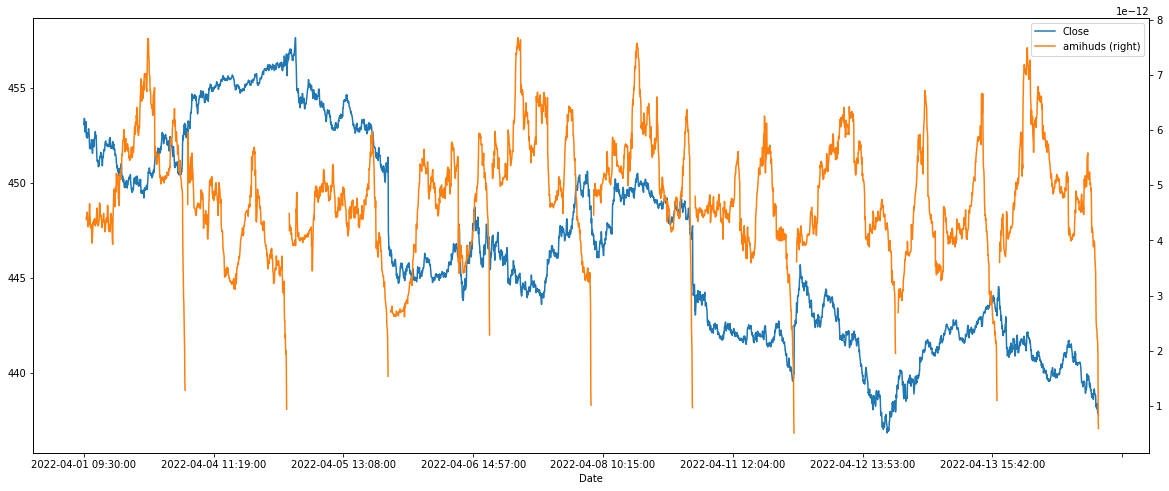

In [4]:
rolling_window = "1H"

data["amihuds"], data["t_stat"] = microstructure.amihuds_lambda_estimator(
    data,
    rolling_window=rolling_window,
    min_periods=10,
    use_close_close=False,
    with_t_value=True,
)
data["log_amihuds"] = np.log(data["amihuds"])
u.index_as_string(data[["Close", "amihuds"]]).plot(secondary_y="amihuds")

<AxesSubplot:ylabel='Frequency'>

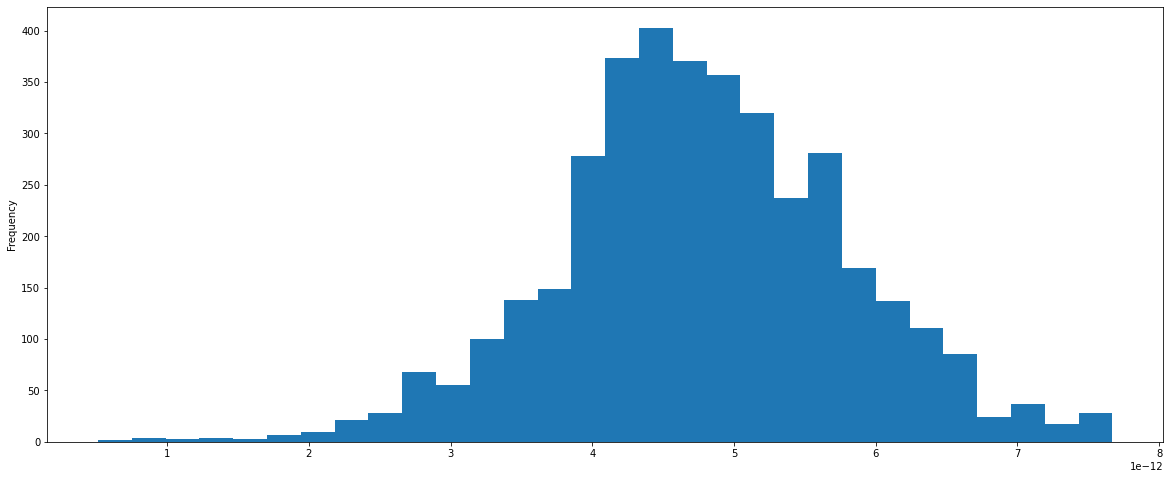

In [5]:
data["amihuds"].plot.hist(bins=30)

<AxesSubplot:xlabel='Date'>

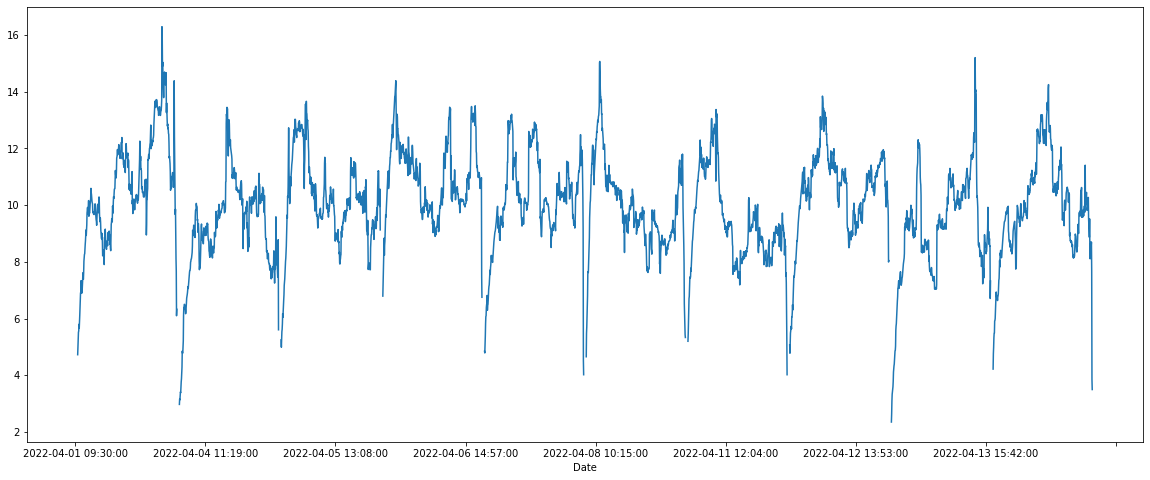

In [6]:
u.index_as_string(data["t_stat"]).plot()